In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


In [ ]:
df_flare=pd.read_csv("/content/drive/MyDrive/Datasets/flares_dataset_v1.csv",low_memory=False)
df_sunspot=pd.read_csv("/content/drive/MyDrive/Datasets/sunspot_dataset_v1.csv",low_memory=False)

In [ ]:
df_flare.sample(5)

,Date,start_time,end_time,peak_time,location,classification,type,observartories,NOAA,meridain_date,xray_flux,Classification+type,year,xray_flux_sci
34029,1995-02-07,07:34:00,07:39:00,07:37:00,S12W28SF,B,27.0,NaN,7834.0,NaN,NaN,B 27,1995,NaN
36271,1997-11-11,07:07:00,07:49:00,07:27:00,N26W71SF,C,47.0,NaN,8103.0,NaN,0.0083,C 47,1997,0.0083
47672,2002-05-29,12:51:00,13:07:00,13:00:00,N17W65SF,C,33.0,NaN,9960.0,NaN,0.0026,C 33,2002,0.0026
66116,2013-12-31,18:53:00,19:03:00,18:59:00,S13W41,C,40.0,NaN,11940.0,NaN,0.0014,C 40,2013,0.0014
6897,1982-10-01,03:52:00,04:11:00,03:57:00,S11W30SN,C,16.0,NaN,3919.0,NaN,NaN,C 16,1982,NaN


In [ ]:
df_sunspot.head()

,Date,Time,Location,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,individual date,regional date,station_number,observartories
0,1981-12-01,02:01:00,N13W46,BG,3478.0,EKI,32.0,12.0,600.0,811127.5,811127.5,938.0,4LEAR
1,1981-12-01,11:05:00,N13W46,,3478.0,EHI,16.0,11.0,530.0,811127.6,811127.5,205.0,2MANI
2,1981-12-01,21:00:00,N12W47,BG,3478.0,EHO,22.0,14.0,710.0,811127.5,811127.5,626.0,2PALE
3,1981-12-01,13:55:00,N15W56,BG,3478.0,EHI,31.0,13.0,670.0,811127.3,811127.5,468.0,2RAMY
4,1981-12-01,15:35:00,N13W55,BG,3478.0,EHI,17.0,13.0,430.0,811127.5,811127.5,624.0,2HOLL


In [ ]:
df_flare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71984 entries, 0 to 71983
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 71984 non-null  object 
 1   start_time           71976 non-null  object 
 2   end_time             71521 non-null  object 
 3   peak_time            70796 non-null  object 
 4   location             34454 non-null  object 
 5   classification       71784 non-null  object 
 6   type                 71764 non-null  float64
 7   observartories       6349 non-null   object 
 8   NOAA                 36580 non-null  float64
 9   meridain_date        6040 non-null   float64
 10  xray_flux            36672 non-null  float64
 11  Classification+type  71984 non-null  object 
 12  year                 71984 non-null  int64  
 13  xray_flux_sci        36672 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 7.7+ MB


In [ ]:
df_flare["Date"].astype(str)

0        1981-01-02
1        1981-01-02
2        1981-01-03
3        1981-01-03
4        1981-01-03
            ...    
71979    2017-06-26
71980    2017-06-27
71981    2017-06-27
71982    2017-06-27
71983    2017-06-28
Name: Date, Length: 71984, dtype: object

In [ ]:
df_flare["Date"]=pd.to_datetime(df_flare["Date"],errors="coerce")
df_flare['start_time']=pd.to_datetime(df_flare['start_time'],errors='coerce')
df_flare['end_time']=pd.to_datetime(df_flare['end_time'],errors='coerce')
df_flare['peak_time']=pd.to_datetime(df_flare['peak_time'],errors='coerce')

In [ ]:
df_flare.head()

,Date,start_time,end_time,peak_time,location,classification,type,observartories,NOAA,meridain_date,xray_flux,Classification+type,year,xray_flux_sci
0,1981-01-02,2024-01-11 04:41:00,2024-01-11 04:46:00,2024-01-11 04:44:00,NaN,C,18.0,NaN,NaN,NaN,NaN,C 18,1981,NaN
1,1981-01-02,2024-01-11 09:55:00,2024-01-11 10:04:00,2024-01-11 10:00:00,NaN,C,18.0,NaN,NaN,NaN,NaN,C 18,1981,NaN
2,1981-01-03,2024-01-11 22:27:00,2024-01-11 22:41:00,2024-01-11 22:32:00,N14W78SN,C,20.0,NaN,2866.0,NaN,NaN,C 20,1981,NaN
3,1981-01-03,2024-01-11 10:25:00,2024-01-11 10:36:00,2024-01-11 10:30:00,NaN,C,51.0,NaN,NaN,NaN,NaN,C 51,1981,NaN
4,1981-01-03,2024-01-11 15:49:00,2024-01-11 15:58:00,2024-01-11 15:53:00,NaN,C,22.0,NaN,NaN,NaN,NaN,C 22,1981,NaN


In [ ]:
df_flare.dropna(subset=["NOAA","start_time","end_time","peak_time","classification","type"],inplace=True)

In [ ]:
def merging(f):
  x=pd.to_datetime(f["Date"]).date()
  y=pd.to_datetime(f["start_time"]).time()
  z=f"{x} {y}"
  return pd.to_datetime(z)

In [ ]:
df_flare["Date_time_f"]=df_flare.apply(merging,axis=1)

In [ ]:
df_flare.sample(5)

,Date,start_time,end_time,peak_time,location,classification,type,observartories,NOAA,meridain_date,xray_flux,Classification+type,year,xray_flux_sci,Date_time_f
50761,2003-07-21,2024-01-11 22:30:00,2024-01-11 22:35:00,2024-01-11 22:33:00,N15W37SF,C,20.0,NaN,10409.0,NaN,0.00050,C 20,2003,0.00050,2003-07-21 22:30:00
60697,2011-05-11,2024-01-11 20:28:00,2024-01-11 20:54:00,2024-01-11 20:36:00,NaN,B,32.0,NaN,11210.0,NaN,0.00043,B 32,2011,0.00043,2011-05-11 20:28:00
808,1981-04-10,2024-01-11 04:14:00,2024-01-11 06:32:00,2024-01-11 04:18:00,N06W28SB,M,21.0,NaN,3025.0,NaN,NaN,M 21,1981,NaN,1981-04-10 04:14:00
42578,2000-06-25,2024-01-11 23:22:00,2024-01-11 23:40:00,2024-01-11 23:32:00,NaN,C,19.0,NaN,9054.0,NaN,0.00190,C 19,2000,0.00190,2000-06-25 23:22:00
5221,1982-03-31,2024-01-11 05:33:00,2024-01-11 06:52:00,2024-01-11 06:20:00,N11W33SB,M,14.0,NaN,3659.0,NaN,NaN,M 14,1982,NaN,1982-03-31 05:33:00


In [ ]:
df_flare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36030 entries, 2 to 71980
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 36030 non-null  datetime64[ns]
 1   start_time           36030 non-null  datetime64[ns]
 2   end_time             36030 non-null  datetime64[ns]
 3   peak_time            36030 non-null  datetime64[ns]
 4   location             31947 non-null  object        
 5   classification       36030 non-null  object        
 6   type                 36030 non-null  float64       
 7   observartories       5360 non-null   object        
 8   NOAA                 36030 non-null  float64       
 9   meridain_date        5336 non-null   float64       
 10  xray_flux            19629 non-null  float64       
 11  Classification+type  36030 non-null  object        
 12  year                 36030 non-null  int64         
 13  xray_flux_sci        19629 non-

In [ ]:
df_flare.isna().sum()

Date                       0
start_time                 0
end_time                   0
peak_time                  0
location                4083
classification             0
type                       0
observartories         30670
NOAA                       0
meridain_date          30694
xray_flux              16401
Classification+type        0
year                       0
xray_flux_sci          16401
Date_time_f                0
dtype: int64

In [ ]:
df_flare.drop(columns=["observartories","meridain_date","xray_flux_sci","year","location"],inplace=True)

In [ ]:
df_flare.isna().sum()

Date                       0
start_time                 0
end_time                   0
peak_time                  0
classification             0
type                       0
NOAA                       0
xray_flux              16401
Classification+type        0
Date_time_f                0
dtype: int64

In [ ]:
df_flare["xray_flux"]=df_flare["xray_flux"].fillna(df_flare["xray_flux"].mean())

In [ ]:
df_flare.isna().sum()

Date                   0
start_time             0
end_time               0
peak_time              0
classification         0
type                   0
NOAA                   0
xray_flux              0
Classification+type    0
Date_time_f            0
dtype: int64

In [ ]:
df_flare.shape

(36030, 10)

In [ ]:
df_flare['NOAA']=df_flare['NOAA'].astype(int)
df_flare['type']=df_flare['type'].astype(int)

In [ ]:
#df_flare['NOAA']=df_flare['NOAA'].astype(str)
#df_flare['type']=df_flare['type'].astype(str)

In [ ]:
df_flare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36030 entries, 2 to 71980
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 36030 non-null  datetime64[ns]
 1   start_time           36030 non-null  datetime64[ns]
 2   end_time             36030 non-null  datetime64[ns]
 3   peak_time            36030 non-null  datetime64[ns]
 4   classification       36030 non-null  object        
 5   type                 36030 non-null  int64         
 6   NOAA                 36030 non-null  int64         
 7   xray_flux            36030 non-null  float64       
 8   Classification+type  36030 non-null  object        
 9   Date_time_f          36030 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(1), int64(2), object(2)
memory usage: 3.0+ MB


In [ ]:
df_sunspot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271879 entries, 0 to 271878
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                271878 non-null  object 
 1   Time                267453 non-null  object 
 2   Location            271879 non-null  object 
 3   Mount Wilson Class  271879 non-null  object 
 4   Region_number       269730 non-null  float64
 5   McIntosh_class      271879 non-null  object 
 6   Number of sunspots  235035 non-null  float64
 7   length              224318 non-null  float64
 8   area                221349 non-null  float64
 9   individual date     212806 non-null  float64
 10  regional date       182338 non-null  float64
 11  station_number      234583 non-null  float64
 12  observartories      271879 non-null  object 
dtypes: float64(7), object(6)
memory usage: 27.0+ MB


In [ ]:
df_sunspot.drop(columns=["individual date","Location","regional date","station_number","observartories"],inplace=True)

In [ ]:
df_sunspot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271879 entries, 0 to 271878
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                271878 non-null  object 
 1   Time                267453 non-null  object 
 2   Mount Wilson Class  271879 non-null  object 
 3   Region_number       269730 non-null  float64
 4   McIntosh_class      271879 non-null  object 
 5   Number of sunspots  235035 non-null  float64
 6   length              224318 non-null  float64
 7   area                221349 non-null  float64
dtypes: float64(4), object(4)
memory usage: 16.6+ MB


In [ ]:
df_sunspot['Date']=pd.to_datetime(df_sunspot['Date'],errors="coerce")
df_sunspot['Time']=pd.to_datetime(df_sunspot['Time'],errors="coerce")
df_sunspot['Region_number']=df_sunspot['Region_number']

In [ ]:
df_sunspot.dropna(subset=["Time","Date"],inplace=True)

In [ ]:
df_sunspot.sample(5)

,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area
218241,2002-06-25,2024-01-11 14:30:00,(AP,1.0,,NaN,NaN,NaN
195015,2000-10-24,2024-01-11 14:45:00,(BP,9199.0,,NaN,NaN,NaN
270454,2016-08-24,2024-01-11 05:20:00,B,2579.0,DAO,11.0,5.0,70.0
245381,2011-09-02,2024-01-11 23:00:00,B,1282.0,DSO,15.0,9.0,170.0
29797,1984-03-21,2024-01-11 15:15:00,A,4450.0,AXX,2.0,1.0,10.0


In [ ]:
def merging(f):
  x=pd.to_datetime(f["Date"]).date()
  y=pd.to_datetime(f["Time"]).time()
  z=f"{x} {y}"
  return pd.to_datetime(z)

In [ ]:
df_sunspot["Date_time_s"]=df_sunspot.apply(merging,axis=1)

In [ ]:
df_sunspot.sample(5)

,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s
176574,1999-06-23,2024-01-11 15:02:00,B,8594.0,CAO,8.0,8.0,180.0,1999-06-23 15:02:00
77642,1989-10-01,2024-01-11 19:22:00,BG,5712.0,FHI,61.0,34.0,530.0,1989-10-01 19:22:00
142243,1992-11-01,2024-01-11 12:43:00,B,7329.0,BXO,2.0,4.0,10.0,1992-11-01 12:43:00
217735,2002-06-11,2024-01-11 14:12:00,B,9991.0,CKO,5.0,6.0,230.0,2002-06-11 14:12:00
4978,1982-03-26,2024-01-11 03:00:00,A,3652.0,HHX,2.0,4.0,440.0,1982-03-26 03:00:00


In [ ]:
df_sunspot.isna().sum()

Date                      0
Time                      0
Mount Wilson Class        0
Region_number          2133
McIntosh_class            0
Number of sunspots    36798
length                47426
area                  50286
Date_time_s               0
dtype: int64

In [ ]:
df_sunspot.isna().sum()

Date                      0
Time                      0
Mount Wilson Class        0
Region_number          2133
McIntosh_class            0
Number of sunspots    36798
length                47426
area                  50286
Date_time_s               0
dtype: int64

In [ ]:
df_sunspot['Number of sunspots']=df_sunspot['Number of sunspots'].fillna(df_sunspot['Number of sunspots'].mean())
df_sunspot['length']=df_sunspot['length'].fillna(df_sunspot['length'].mean())
df_sunspot['area']=df_sunspot['area'].fillna(df_sunspot['area'].mean())


In [ ]:
df_sunspot.isna().sum()

Date                     0
Time                     0
Mount Wilson Class       0
Region_number         2133
McIntosh_class           0
Number of sunspots       0
length                   0
area                     0
Date_time_s              0
dtype: int64

In [ ]:
df_flare.head()

,Date,start_time,end_time,peak_time,classification,type,NOAA,xray_flux,Classification+type,Date_time_f
2,1981-01-03,2024-01-11 22:27:00,2024-01-11 22:41:00,2024-01-11 22:32:00,C,20,2866,0.005631,C 20,1981-01-03 22:27:00
7,1981-01-03,2024-01-11 21:59:00,2024-01-11 22:10:00,2024-01-11 22:02:00,C,12,2857,0.005631,C 12,1981-01-03 21:59:00
11,1981-01-04,2024-01-11 16:51:00,2024-01-11 17:09:00,2024-01-11 16:57:00,C,22,2872,0.005631,C 22,1981-01-04 16:51:00
20,1981-01-05,2024-01-11 13:58:00,2024-01-11 14:11:00,2024-01-11 14:00:00,C,18,2875,0.005631,C 18,1981-01-05 13:58:00
23,1981-01-06,2024-01-11 16:53:00,2024-01-11 17:03:00,2024-01-11 16:55:00,C,19,2875,0.005631,C 19,1981-01-06 16:53:00


In [ ]:
df_flare.shape

(36030, 10)

In [ ]:
df_flare[df_flare['Date']=="2007-01-04"]

,Date,start_time,end_time,peak_time,classification,type,NOAA,xray_flux,Classification+type,Date_time_f


In [ ]:
#df_sunspot['Date']=pd.to_datetime(df_sunspot['Date']).dt.tz_localize(None)

In [ ]:
df_sunspot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267452 entries, 0 to 271878
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                267452 non-null  datetime64[ns]
 1   Time                267452 non-null  datetime64[ns]
 2   Mount Wilson Class  267452 non-null  object        
 3   Region_number       265319 non-null  float64       
 4   McIntosh_class      267452 non-null  object        
 5   Number of sunspots  267452 non-null  float64       
 6   length              267452 non-null  float64       
 7   area                267452 non-null  float64       
 8   Date_time_s         267452 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(4), object(2)
memory usage: 20.4+ MB


In [ ]:
df_sunspot.head()

,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s
0,1981-12-01,2024-01-11 02:01:00,BG,3478.0,EKI,32.0,12.0,600.0,1981-12-01 02:01:00
1,1981-12-01,2024-01-11 11:05:00,,3478.0,EHI,16.0,11.0,530.0,1981-12-01 11:05:00
2,1981-12-01,2024-01-11 21:00:00,BG,3478.0,EHO,22.0,14.0,710.0,1981-12-01 21:00:00
3,1981-12-01,2024-01-11 13:55:00,BG,3478.0,EHI,31.0,13.0,670.0,1981-12-01 13:55:00
4,1981-12-01,2024-01-11 15:35:00,BG,3478.0,EHI,17.0,13.0,430.0,1981-12-01 15:35:00


In [ ]:
#df_flare[df_flare['Date']>="1981-01-03"]

In [ ]:
df_flare.head()

,Date,start_time,end_time,peak_time,classification,type,NOAA,xray_flux,Classification+type,Date_time_f
2,1981-01-03,2024-01-11 22:27:00,2024-01-11 22:41:00,2024-01-11 22:32:00,C,20,2866,0.005631,C 20,1981-01-03 22:27:00
7,1981-01-03,2024-01-11 21:59:00,2024-01-11 22:10:00,2024-01-11 22:02:00,C,12,2857,0.005631,C 12,1981-01-03 21:59:00
11,1981-01-04,2024-01-11 16:51:00,2024-01-11 17:09:00,2024-01-11 16:57:00,C,22,2872,0.005631,C 22,1981-01-04 16:51:00
20,1981-01-05,2024-01-11 13:58:00,2024-01-11 14:11:00,2024-01-11 14:00:00,C,18,2875,0.005631,C 18,1981-01-05 13:58:00
23,1981-01-06,2024-01-11 16:53:00,2024-01-11 17:03:00,2024-01-11 16:55:00,C,19,2875,0.005631,C 19,1981-01-06 16:53:00


In [ ]:
df_flare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36030 entries, 2 to 71980
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 36030 non-null  datetime64[ns]
 1   start_time           36030 non-null  datetime64[ns]
 2   end_time             36030 non-null  datetime64[ns]
 3   peak_time            36030 non-null  datetime64[ns]
 4   classification       36030 non-null  object        
 5   type                 36030 non-null  int64         
 6   NOAA                 36030 non-null  int64         
 7   xray_flux            36030 non-null  float64       
 8   Classification+type  36030 non-null  object        
 9   Date_time_f          36030 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(1), int64(2), object(2)
memory usage: 3.0+ MB


In [ ]:
df_sunspot.head()

,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s
0,1981-12-01,2024-01-11 02:01:00,BG,3478.0,EKI,32.0,12.0,600.0,1981-12-01 02:01:00
1,1981-12-01,2024-01-11 11:05:00,,3478.0,EHI,16.0,11.0,530.0,1981-12-01 11:05:00
2,1981-12-01,2024-01-11 21:00:00,BG,3478.0,EHO,22.0,14.0,710.0,1981-12-01 21:00:00
3,1981-12-01,2024-01-11 13:55:00,BG,3478.0,EHI,31.0,13.0,670.0,1981-12-01 13:55:00
4,1981-12-01,2024-01-11 15:35:00,BG,3478.0,EHI,17.0,13.0,430.0,1981-12-01 15:35:00


In [ ]:
merged_df = pd.merge(df_sunspot, df_flare,on='Date',how='left')
merged_df.head()

,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s,start_time,end_time,peak_time,classification,type,NOAA,xray_flux,Classification+type,Date_time_f
0,1981-12-01,2024-01-11 02:01:00,BG,3478.0,EKI,32.0,12.0,600.0,1981-12-01 02:01:00,2024-01-11 16:54:00,2024-01-11 18:10:00,2024-01-11 16:59:00,M,21.0,3484.0,0.005631,M 21,1981-12-01 16:54:00
1,1981-12-01,2024-01-11 02:01:00,BG,3478.0,EKI,32.0,12.0,600.0,1981-12-01 02:01:00,2024-01-11 15:39:00,2024-01-11 15:50:00,2024-01-11 15:41:00,C,24.0,3485.0,0.005631,C 24,1981-12-01 15:39:00
2,1981-12-01,2024-01-11 02:01:00,BG,3478.0,EKI,32.0,12.0,600.0,1981-12-01 02:01:00,2024-01-11 08:25:00,2024-01-11 09:12:00,2024-01-11 08:42:00,M,34.0,3484.0,0.005631,M 34,1981-12-01 08:25:00
3,1981-12-01,2024-01-11 02:01:00,BG,3478.0,EKI,32.0,12.0,600.0,1981-12-01 02:01:00,2024-01-11 07:54:00,2024-01-11 08:10:00,2024-01-11 07:55:00,C,28.0,3484.0,0.005631,C 28,1981-12-01 07:54:00
4,1981-12-01,2024-01-11 02:01:00,BG,3478.0,EKI,32.0,12.0,600.0,1981-12-01 02:01:00,2024-01-11 05:45:00,2024-01-11 06:18:00,2024-01-11 05:52:00,M,17.0,3484.0,0.005631,M 17,1981-12-01 05:45:00


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082635 entries, 0 to 1082634
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Date                 1082635 non-null  datetime64[ns]
 1   Time                 1082635 non-null  datetime64[ns]
 2   Mount Wilson Class   1082635 non-null  object        
 3   Region_number        1076571 non-null  float64       
 4   McIntosh_class       1082635 non-null  object        
 5   Number of sunspots   1082635 non-null  float64       
 6   length               1082635 non-null  float64       
 7   area                 1082635 non-null  float64       
 8   Date_time_s          1082635 non-null  datetime64[ns]
 9   start_time           1044174 non-null  datetime64[ns]
 10  end_time             1044174 non-null  datetime64[ns]
 11  peak_time            1044174 non-null  datetime64[ns]
 12  classification       1044174 non-null  object        
 1

In [ ]:
merged_df.isna().sum()

Date                       0
Time                       0
Mount Wilson Class         0
Region_number           6064
McIntosh_class             0
Number of sunspots         0
length                     0
area                       0
Date_time_s                0
start_time             38461
end_time               38461
peak_time              38461
classification         38461
type                   38461
NOAA                   38461
xray_flux              38461
Classification+type    38461
Date_time_f            38461
dtype: int64

In [ ]:
merged_df.dropna(subset=["start_time"],inplace=True)

In [ ]:
merged_df.sample(5)

,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s,start_time,end_time,peak_time,classification,type,NOAA,xray_flux,Classification+type,Date_time_f
387497,1990-09-03,2024-01-11 13:10:00,A,6242.0,HR,1.000000,1.000000,10.000000,1990-09-03 13:10:00,2024-01-11 02:19:00,2024-01-11 02:32:00,2024-01-11 02:19:00,C,35.0,6233.0,0.005631,C 35,1990-09-03 02:19:00
598315,1992-07-13,2024-01-11 03:00:00,A,7225.0,HS,1.000000,2.000000,60.000000,1992-07-13 03:00:00,2024-01-11 20:05:00,2024-01-11 20:51:00,2024-01-11 20:13:00,C,73.0,7219.0,0.005631,C 73,1992-07-13 20:05:00
813995,2001-06-12,2024-01-11 14:00:00,(AP,9495.0,A,8.040641,6.066301,146.690891,2001-06-12 14:00:00,2024-01-11 00:35:00,2024-01-11 00:39:00,2024-01-11 00:36:00,C,12.0,9492.0,0.000270,C 12,2001-06-12 00:35:00
863036,2002-02-13,2024-01-11 08:50:00,B,9826.0,DSO,5.000000,6.000000,30.000000,2002-02-13 08:50:00,2024-01-11 06:57:00,2024-01-11 07:25:00,2024-01-11 07:12:00,C,78.0,9825.0,0.009300,C 78,2002-02-13 06:57:00
538030,1991-10-11,2024-01-11 17:30:00,A,6874.0,HR,2.000000,1.000000,10.000000,1991-10-11 17:30:00,2024-01-11 20:15:00,2024-01-11 20:46:00,2024-01-11 20:18:00,C,59.0,6873.0,0.005631,C 59,1991-10-11 20:15:00


In [ ]:
merged_df.isna().sum()

Date                      0
Time                      0
Mount Wilson Class        0
Region_number          5348
McIntosh_class            0
Number of sunspots        0
length                    0
area                      0
Date_time_s               0
start_time                0
end_time                  0
peak_time                 0
classification            0
type                      0
NOAA                      0
xray_flux                 0
Classification+type       0
Date_time_f               0
dtype: int64

In [ ]:
merged_df.dropna(subset=["Region_number"],inplace=True)

In [ ]:
merged_df.isna().sum()

Date                   0
Time                   0
Mount Wilson Class     0
Region_number          0
McIntosh_class         0
Number of sunspots     0
length                 0
area                   0
Date_time_s            0
start_time             0
end_time               0
peak_time              0
classification         0
type                   0
NOAA                   0
xray_flux              0
Classification+type    0
Date_time_f            0
dtype: int64

In [ ]:
merged_df.sample(5)

,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s,start_time,end_time,peak_time,classification,type,NOAA,xray_flux,Classification+type,Date_time_f
903485,2002-10-27,2024-01-11 07:24:00,A,172.0,HSX,1.0,1.0,20.000000,2002-10-27 07:24:00,2024-01-11 08:13:00,2024-01-11 08:24:00,2024-01-11 08:20:00,C,12.0,10162.0,0.000630,C 12,2002-10-27 08:13:00
176730,1988-03-25,2024-01-11 14:00:00,B,4975.0,EAI,27.0,12.0,750.000000,1988-03-25 14:00:00,2024-01-11 07:25:00,2024-01-11 07:40:00,2024-01-11 07:26:00,C,27.0,4975.0,0.005631,C 27,1988-03-25 07:25:00
1034881,2013-10-04,2024-01-11 07:15:00,B,1858.0,DSO,3.0,8.0,90.000000,2013-10-04 07:15:00,2024-01-11 03:17:00,2024-01-11 03:52:00,2024-01-11 03:32:00,C,25.0,11856.0,0.003800,C 25,2013-10-04 03:17:00
259407,1989-04-20,2024-01-11 17:32:00,A,5460.0,AX,1.0,1.0,146.690891,1989-04-20 17:32:00,2024-01-11 14:03:00,2024-01-11 14:38:00,2024-01-11 14:12:00,C,44.0,5451.0,0.005631,C 44,1989-04-20 14:03:00
121901,1983-10-07,2024-01-11 18:10:00,A,4335.0,AX,2.0,2.0,20.000000,1983-10-07 18:10:00,2024-01-11 01:53:00,2024-01-11 02:03:00,2024-01-11 01:55:00,B,94.0,4328.0,0.005631,B 94,1983-10-07 01:53:00


In [ ]:
from datetime import datetime

def calculate_time_difference(g):
    try:
        # Convert datetime strings to datetime objects
        start_datetime = datetime.strptime(str(g["Time"]), "%Y-%m-%d %H:%M:%S")
        end_datetime = datetime.strptime(str(g["start_time"]), "%Y-%m-%d %H:%M:%S")

        # Calculate the time difference
        time_difference = end_datetime - start_datetime
        if time_difference.total_seconds() < 0:
          return start_datetime - end_datetime
        else:
          return time_difference

            #time_difference = start_datetime - end_datetime




    except ValueError as e:
        return f"Error: {e}"



In [ ]:
def time(f):
  return f["Date_time_f"]-f["Date_time_s"]

merged_df["time_difference_1"]=merged_df.apply(time,axis=1)

In [ ]:
merged_df["time_difference"]=merged_df.apply(calculate_time_difference,axis=1)

In [ ]:
merged_df.sample(5)

,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s,start_time,end_time,peak_time,classification,type,NOAA,xray_flux,Classification+type,Date_time_f,time_difference_1,time_difference
778808,2000-09-07,2024-01-11 12:33:00,A,9147.0,HSX,1.0,2.0,60.0,2000-09-07 12:33:00,2024-01-11 10:54:00,2024-01-11 11:34:00,2024-01-11 11:15:00,C,44.0,9151.0,0.008000,C 44,2000-09-07 10:54:00,-1 days +22:21:00,0 days 01:39:00
939141,2003-10-27,2024-01-11 10:20:00,B,489.0,CRO,4.0,4.0,30.0,2003-10-27 10:20:00,2024-01-11 14:53:00,2024-01-11 15:07:00,2024-01-11 14:57:00,C,57.0,10488.0,0.004500,C 57,2003-10-27 14:53:00,0 days 04:33:00,0 days 04:33:00
1047990,2014-04-20,2024-01-11 03:03:00,B,2038.0,DAI,12.0,5.0,80.0,2014-04-20 03:03:00,2024-01-11 14:18:00,2024-01-11 15:01:00,2024-01-11 14:46:00,C,18.0,12035.0,0.004000,C 18,2014-04-20 14:18:00,0 days 11:15:00,0 days 11:15:00
193349,1988-07-23,2024-01-11 13:40:00,B,5087.0,CRI,10.0,7.0,10.0,1988-07-23 13:40:00,2024-01-11 13:16:00,2024-01-11 13:37:00,2024-01-11 13:16:00,C,23.0,5075.0,0.005631,C 23,1988-07-23 13:16:00,-1 days +23:36:00,0 days 00:24:00
56610,1982-08-11,2024-01-11 18:50:00,B,3841.0,BXO,3.0,5.0,10.0,1982-08-11 18:50:00,2024-01-11 07:43:00,2024-01-11 08:16:00,2024-01-11 07:46:00,C,16.0,3845.0,0.005631,C 16,1982-08-11 07:43:00,-1 days +12:53:00,0 days 11:07:00


In [ ]:
merged_df['Time']=merged_df['Time'].dt.time
merged_df['start_time']=merged_df['start_time'].dt.time
merged_df['end_time']=merged_df['end_time'].dt.time
merged_df['peak_time']=merged_df['peak_time'].dt.time

In [ ]:
merged_df.to_csv("/content/drive/MyDrive/Datasets/time_difference_2.csv")

In [ ]:
merged_df.sample(5)

,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s,start_time,end_time,peak_time,classification,type,NOAA,xray_flux,Classification+type,Date_time_f,time_difference_1,time_difference
258622,1989-04-17,18:25:00,B,5454.0,CHO,6.0,8.0,300.0,1989-04-17 18:25:00,17:36:00,18:02:00,17:45:00,C,56.0,5452.0,0.005631,C 56,1989-04-17 17:36:00,-1 days +23:11:00,0 days 00:49:00
970062,2005-04-09,14:31:00,B,751.0,DAI,8.0,7.0,90.0,2005-04-09 14:31:00,15:50:00,16:10:00,16:03:00,B,23.0,10751.0,0.000220,B 23,2005-04-09 15:50:00,0 days 01:19:00,0 days 01:19:00
17559,1982-02-22,15:47:00,B,3610.0,EAO,11.0,13.0,110.0,1982-02-22 15:47:00,02:07:00,02:33:00,02:10:00,C,14.0,3607.0,0.005631,C 14,1982-02-22 02:07:00,-1 days +10:20:00,0 days 13:40:00
149102,1985-01-24,18:25:00,B,4617.0,EAO,5.0,13.0,220.0,1985-01-24 18:25:00,00:44:00,01:13:00,00:45:00,C,40.0,4617.0,0.005631,C 40,1985-01-24 00:44:00,-1 days +06:19:00,0 days 17:41:00
103169,1983-05-28,14:03:00,BG,4187.0,CAO,21.0,9.0,80.0,1983-05-28 14:03:00,04:21:00,04:25:00,04:22:00,C,20.0,4196.0,0.005631,C 20,1983-05-28 04:21:00,-1 days +14:18:00,0 days 09:42:00


In [ ]:
def check_number_match(d):
    reference_str = str(d["NOAA"])
    target_str = str(d["Region_number"])

    # Check if the numbers completely match
    if reference_str == target_str:
        return "matched"

    # Check if the first 5 digits match
    elif reference_str[1:] == target_str[:]:
        return "matched"
    elif reference_str[2:] == target_str[:]:
        return "matched"

    # If neither condition is met
    else:
        return "Not matched"


In [ ]:
filtered_df["check"]=filtered_df.apply(check_number_match,axis=1)

NameError: name 'filtered_df' is not defined

In [ ]:
filtered_df.sample(5)

In [ ]:
df=filtered_df[filtered_df['check']=="matched"]

In [ ]:
df_1=filtered_df[filtered_df['check']=="Not matched"]

In [ ]:
df.sample(5)

In [ ]:
df.shape

In [ ]:
df_1['classification'].value_counts()

In [ ]:
df['classification'].value_counts()

In [ ]:
plt.figure(figsize=(28,6))
plt.plot(df["Date"],df['Number of sunspots'])
plt.ylabel("Number of Sunspots")
plt.xlabel("Date")
plt.title("Number of Sunspots")

In [ ]:
plt.figure(figsize=(28,6))
plt.plot(df_1["Date"],df_1['Number of sunspots'])
plt.ylabel("Number of Sunspots")
plt.xlabel("Date")
plt.title("Un Matched Number of Sunspots")

In [ ]:
plt.figure(figsize=(28,6))
plt.plot(df["Date"],df['xray_flux'])
plt.ylabel("Xray Flux")
plt.xlabel("Date")
plt.title("Xray Flux")
plt.yscale("log")

In [ ]:
plt.figure(figsize=(28,6))
plt.plot(df_1["Date"],df_1['xray_flux'])
plt.ylabel("Xray Flux")
plt.xlabel("Date")
plt.title("Xray Flux")
plt.yscale("log")

In [ ]:
import seaborn as sns

<ipython-input-82-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

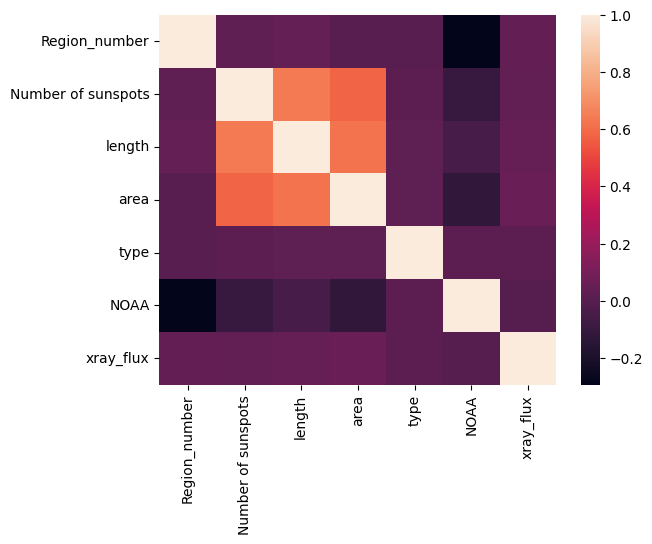

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df[df["Date"]=="2003-11-02"]

,Date,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s,start_time,end_time,peak_time,classification,type,NOAA,xray_flux,Classification+type,Date_time_f,time_difference,check
940308,2003-11-02,22:01:00,BGD,486.0,FKC,60.0,16.0,1890.0,2003-11-02 22:01:00,17:03:00,17:39:00,17:25:00,X,83.0,10486.0,0.910,X 83,2003-11-02 17:03:00,0 days 04:58:00,matched
940344,2003-11-02,15:45:00,BGD,486.0,EKC,47.0,15.0,2290.0,2003-11-02 15:45:00,17:03:00,17:39:00,17:25:00,X,83.0,10486.0,0.910,X 83,2003-11-02 17:03:00,0 days 01:18:00,matched
940351,2003-11-02,15:45:00,BGD,488.0,FKC,19.0,16.0,1680.0,2003-11-02 15:45:00,12:30:00,13:12:00,12:47:00,M,18.0,10488.0,0.035,M 18,2003-11-02 12:30:00,0 days 03:15:00,matched


to confirm that i associated the sunspot features correctly or not checked with the picture in presentation where he showed this is associated feature of the flare and it's matching perfectly

In [ ]:
#df_final_v1['Time']=df_final_v1['Time'].dt.time
df['start_time']=df['start_time'].dt.time
#df_final_v1['end_time']=df_final_v1['end_time'].dt.time
#df_final_v1['peak_time']=df_final_v1['peak_time'].dt.time

AttributeError: ignored

In [ ]:
df_1['start_time']=df_1['start_time'].dt.time


In [ ]:
df_1_filtered = df_1[df_1["classification"].isin(["M", "X"])]
df_1_filtered.sample(5)

In [ ]:
df_filtered = df[df["classification"].isin(["M", "X"])]
df_filtered.sample(5)

In [ ]:
df_filtered.shape

In [ ]:
df_1_filtered.shape

In [ ]:
df_filtered["Time"]=df_filtered["Time"].dt.time


In [ ]:
df_1_filtered["Time"]=df_1_filtered["Time"].dt.time


In [ ]:
df_filtered.sample(5)

In [ ]:
df_filtered["classification"].value_counts()

In [ ]:
df_1_filtered["classification"].value_counts()

after association we have found out that M class flares that we associated are 4046 and X class flares are just 296

In [ ]:
df_filtered["NOAA"].nunique()

In [ ]:
df_1_filtered["NOAA"].nunique()

these flares were produced by 861 different sunspot groups

In [ ]:
df_filtered["NOAA"].value_counts()

the groups whicha are major contributor to M and X class flares are

---
5395       105


3804       90


5312       57


5669       54


4964       49

---




---




In [ ]:
df_1_filtered["NOAA"].value_counts()

In [ ]:
df_filtered["McIntosh_class"].value_counts()

In [ ]:
df_1_filtered["McIntosh_class"].value_counts()

In [ ]:
df_filtered.drop(columns=["Classification+type",'time_difference',"check"],inplace=True)

In [ ]:
df_1_filtered.drop(columns=["Classification+type",'time_difference',"check"],inplace=True)

In [ ]:
df_filtered.drop(columns=["end_time",'peak_time'],inplace=True)

In [ ]:
df_1_filtered.drop(columns=["end_time",'peak_time'],inplace=True)

In [ ]:
df_filtered.sample(5)

In [ ]:
df_1_filtered.head()

In [ ]:
df_filtered.tail()

In [ ]:
df_1_filtered=df_1_filtered.set_index('Date')

In [ ]:
df_filtered=df_filtered.set_index('Date')

In [ ]:
df_filtered.head()

,Time,Mount Wilson Class,Region_number,McIntosh_class,Number of sunspots,length,area,Date_time_s,start_time,classification,type,NOAA,xray_flux,Date_time_f
Date,,,,,,,,,,,,,,
1981-12-01,02:01:00,BG,3484.0,DAI,32.0,10.0,180.0,1981-12-01 02:01:00,05:45:00,M,17.0,3484.0,0.005631,1981-12-01 05:45:00
1981-12-01,11:05:00,,3484.0,EAI,15.0,11.0,160.0,1981-12-01 11:05:00,16:54:00,M,21.0,3484.0,0.005631,1981-12-01 16:54:00
1981-12-01,13:55:00,B,3484.0,DAI,35.0,9.0,250.0,1981-12-01 13:55:00,16:54:00,M,21.0,3484.0,0.005631,1981-12-01 16:54:00
1981-12-01,15:35:00,B,3484.0,EAI,21.0,11.0,190.0,1981-12-01 15:35:00,16:54:00,M,21.0,3484.0,0.005631,1981-12-01 16:54:00
1981-12-01,16:00:00,B,3484.0,DAI,10.0,10.0,200.0,1981-12-01 16:00:00,16:54:00,M,21.0,3484.0,0.005631,1981-12-01 16:54:00


In [ ]:
df_filtered.drop(columns=["Time","start_time"],inplace=True)

In [ ]:
df_1_filtered.drop(columns=["Time","start_time"],inplace=True)

In [ ]:
df_filtered.drop(columns=["Mount Wilson Class","Date_time_s","Date_time_f"],inplace=True)

In [ ]:
df_1_filtered.drop(columns=["Mount Wilson Class","Date_time_s","Date_time_f"],inplace=True)

In [ ]:
df_1_filtered.sample(5)

,Region_number,McIntosh_class,Number of sunspots,length,area,classification,type,NOAA,xray_flux
Date,,,,,,,,,
1989-02-22,5376.0,AX,2.000000,1.000000,10.000000,M,13.0,5368.0,0.005631
2003-10-19,482.0,,8.040641,6.066301,146.690891,X,11.0,10484.0,0.140000
1990-12-26,6423.0,EAO,54.000000,11.000000,290.000000,X,19.0,6420.0,0.005631
1989-01-30,5330.0,FAI,48.000000,21.000000,250.000000,M,13.0,5329.0,0.005631
1991-03-22,6549.0,CAO,12.000000,7.000000,110.000000,M,63.0,6555.0,0.005631


In [ ]:
# Assuming df is your time series DataFrame
train_size = int(len(df_filtered) * 0.8)  # 80% for training
train_data, test_data = df_filtered[:train_size], df_filtered[train_size:]


In [ ]:
X_train, y_train = train_data.drop('classification', axis=1), train_data['classification']
X_test, y_test = test_data.drop('classification', axis=1), test_data['classification']

In [ ]:
X_train.shape

(3473, 8)

In [ ]:
X_test.shape

(869, 8)

In [ ]:
y_train.shape

(3473,)

In [ ]:
y_test.shape

(869,)

In [ ]:
from sklearn import svm

In [ ]:
classifier=svm.SVC(kernel="rbf",gamma="scale",C=2)
classifier.fit(X_train,y_train)

ValueError: ignored

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-flare', 'M-class', 'X-class'], yticklabels=['Non-flare', 'M-class', 'X-class'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
df_1_filtered.head()

In [ ]:
df_copy=df_filtered.copy()

In [ ]:
df_copy=df_copy.set_index("Date")

In [ ]:
df_copy.sample(5)

In [ ]:
df_copy.drop(columns=["Time","Mount Wilson Class","Region_number","Date_time_s","start_time","end_time","peak_time","type","NOAA","xray_flux","Classification+type","Date_time_f","time_difference","check"],inplace=True)

In [ ]:
df_copy.sample(5)

In [ ]:
df_1_filtered.sample(5)

In [ ]:
df_1_filtered.sample(5)

In [ ]:
df_1_filtered.drop(columns=["Region_number","NOAA","xray_flux"],inplace=True)

In [ ]:
df_1_filtered['McIntosh_class'].str.strip().eq('').sum()


In [ ]:
df_copy['McIntosh_class'].str.strip().eq('').sum()


In [ ]:
df_copy['McIntosh_class'].apply(lambda x: x.isspace()).sum()


In [ ]:
df_copy['McIntosh_class'] = df_copy['McIntosh_class'].replace(r'^\s*$', pd.NA, regex=True)


In [ ]:
df_1_filtered['McIntosh_class'] = df_1_filtered['McIntosh_class'].replace(r'^\s*$', pd.NA, regex=True)


In [ ]:
df_copy.isna().sum()

In [ ]:
df_1_filtered.isna().sum()

In [ ]:
df_copy.info()

In [ ]:
df_1_filtered.dropna(inplace=True)

In [ ]:
df_copy.dropna(inplace=True)

In [ ]:
df_copy['McIntosh_class'].value_counts()

In [ ]:
df_1_filtered['McIntosh_class'].value_counts()

In [ ]:
df_copy[['Class0', 'Class1', 'Class2',"Class3"]] = df_copy['McIntosh_class'].str.split('', expand=True).iloc[:, 1:5]


In [ ]:
df_1_filtered[['Class0', 'Class1', 'Class2',"Class3"]] = df_1_filtered['McIntosh_class'].str.split('', expand=True).iloc[:, 1:5]


In [ ]:
df_copy.sample(5)

In [ ]:
df_1_filtered.sample(5)

In [ ]:
df_copy.drop(columns=["Class0"],inplace=True)

In [ ]:
df_1_filtered.drop(columns=["Class0"],inplace=True)

In [ ]:
df_copy.sample(5)

In [ ]:
class_1={"A":0.10,"H":0.15,"B":0.30,"C":0.45,"D":0.60,"E":0.75,"F":0.90}
def map_class_1(class_1_value):
    return class_1.get(class_1_value, pd.NA)
df_copy['numeric_class_1'] = df_copy['Class1'].apply(map_class_1)
df_1_filtered['numeric_class_1'] = df_1_filtered['Class1'].apply(map_class_1)


In [ ]:
class_2={"X":0,"R":0.10,"S":0.30,"A":0.50,"H":0.70,"K":0.90}
def map_class_2(class_2_value):
    return class_2.get(class_2_value, pd.NA)
df_copy['numeric_class_2'] = df_copy['Class2'].apply(map_class_2)


In [ ]:
df_1_filtered['numeric_class_2'] = df_1_filtered['Class2'].apply(map_class_2)


In [ ]:
class_3={"X":0,"O":0.10,"C":0.90,"I":0.50}
def map_class_3(class_3_value):
    return class_3.get(class_3_value, pd.NA)
df_copy['numeric_class_3'] = df_copy['Class3'].apply(map_class_3)


In [ ]:
df_1_filtered['numeric_class_3'] = df_1_filtered['Class3'].apply(map_class_3)


In [ ]:
df_copy.sample(5)

In [ ]:
df_1_filtered.sample(5)

In [ ]:
df_copy.isna().sum()

In [ ]:
df_1_filtered.isna().sum()

In [ ]:
df_copy.dropna(inplace=True)

In [ ]:
df_1_filtered.dropna(inplace=True)

In [ ]:
df_copy.shape

In [ ]:
df_1_filtered.shape

In [ ]:
res={"M":0.1,"X":0.9}
def map_class_4(class_3_value):
    return res.get(class_3_value, pd.NA)
df_copy['target'] = df_copy['classification'].apply(map_class_4)

In [ ]:
df_1_filtered['target'] = df_1_filtered['classification'].apply(map_class_4)

In [ ]:
df_copy.sample(5)

In [ ]:
df_1_filtered.sample(5)

In [ ]:
df_copy.drop(columns=["McIntosh_class","classification","Class1","Class2","Class3"],inplace=True)

In [ ]:
df_1_filtered.drop(columns=["McIntosh_class","classification","Class1","Class2","Class3","type"],inplace=True)

In [ ]:
df_copy.sample(5)

In [ ]:
df_1_filtered.sample(5)

In [ ]:
df_copy.info()

In [ ]:
df_copy['target']=df_copy['target'].astype(object)

In [ ]:
df_1_filtered['target']=df_1_filtered['target'].astype(object)

In [ ]:
df_copy['target'].value_counts()

In [ ]:
df_1_filtered['target'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'target' is your target variable
label_encoder = LabelEncoder()
df_1_filtered['target'] = label_encoder.fit_transform(df_1_filtered['target'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame and 'target' is your target variable
label_encoder = LabelEncoder()
df_copy['target'] = label_encoder.fit_transform(df_copy['target'])

In [ ]:
df_1_filtered.sample(5)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is named df

# Define features (X) and target variable (y)
X = df_1_filtered[['Number of sunspots', 'length', 'area', 'numeric_class_1', 'numeric_class_2', 'numeric_class_3']]
y = df_1_filtered['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = SVC(kernel='rbf', random_state=42,class_weight="balanced")

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming your DataFrame is named df

# Define features (X) and target variable (y)
X = df_copy[['Number of sunspots', 'length', 'area', 'numeric_class_1', 'numeric_class_2', 'numeric_class_3']]
y = df_copy['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = SVC(kernel='linear', random_state=42,class_weight="balanced",C=2)

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-flare', 'M-class', 'X-class'], yticklabels=['Non-flare', 'M-class', 'X-class'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import numpy as np
np.bincount(y_train)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE(random_state=42)
X_res,y_res=sm.fit_resample(X_train,y_train)

In [ ]:
np.bincount(y_res)

In [ ]:


# Create an SVM classifier
clf = SVC(kernel='linear', random_state=42,class_weight="balanced")

# Train the classifier on the training set
clf.fit(X_res, y_res)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
